In [1]:
import pandas as pd 
import gspread 
from oauth2client.service_account import ServiceAccountCredentials

import networkx as nx

import os

import matplotlib.pyplot as plt

In [2]:
scope = ['https://spreadsheets.google.com/feeds'] 
credentials = ServiceAccountCredentials.from_json_keyfile_name('./yc3-commercial-6220ab614961.json', scope) 
gc = gspread.authorize(credentials)

In [3]:
class Commercial():
    def __init__(self, data):
        self.filename = data[0]
        self.title = data[1]
        self.desc = data[2]
        self.cutscene = data[3]
        self.email = data[4]
        self.item = data[5]
        self.unlocks = data[6].split(',')
        self.objectives = data[7:]
    def __repr__(self):
        return str(self.__dict__)

In [4]:
spreadsheet_key = '1p0WMa-LLN164xUQTn4xs-afb8hIec7Z766e8a6Fpb-M' 
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("Sheet1") 
table = worksheet.get_all_values()

In [5]:
commercials = [Commercial(x) for x in table[1:]]

G = nx.Graph()

G.add_nodes_from([c.filename for c in commercials])

for commercial in commercials:
    if commercial.unlocks == ['']: continue
    for unlock in commercial.unlocks:
        G.add_edge(commercial.filename, unlock)

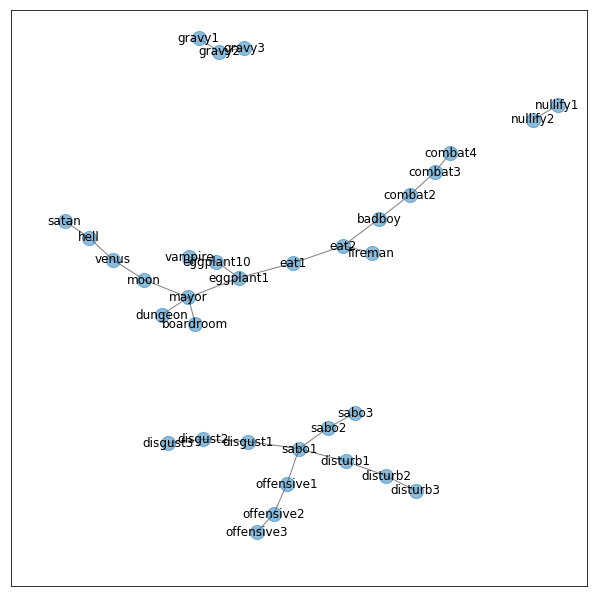

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])

pos = nx.networkx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, ax=ax,
                       alpha=0.5, node_size=200)

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos, {c.filename:c.filename for c in commercials}, ax=ax)

ax.set_xticks([])
ax.set_yticks([])
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim([xlim[0] * 1.1, xlim[1]])
ax.set_ylim([ylim[0] * 1.1, ylim[1]])

plt.show(fig)

# Write commercial files

In [7]:
OUTPUT_DIR = 'commercials_output'
ORIG_DIR = 'commercials_orig'

def writeline(line, file):
    file.write('{}\n'.format(line))

for commercial in commercials:
    path = os.path.join(OUTPUT_DIR, commercial.filename) +'.txt'
    print('writing {}...'.format(path))
    with open(path, 'w') as outfile:
        writeline(commercial.title, outfile)
        writeline(commercial.desc, outfile)
        writeline(commercial.cutscene, outfile)
        if (commercial.unlocks != ['']):
            for unlock in commercial.unlocks:
                writeline('unlock,{}'.format(unlock), outfile)
        if (commercial.item != ''):
            writeline('item,{}'.format(commercial.item), outfile)
        if (commercial.email != ''):
            writeline('email,{}'.format(commercial.email), outfile)
        for objective in commercial.objectives:
            if (objective != ''):
                writeline(objective, outfile)


writing commercials_output/badboy.txt...
writing commercials_output/boardroom.txt...
writing commercials_output/disgust1.txt...
writing commercials_output/disgust2.txt...
writing commercials_output/disgust3.txt...
writing commercials_output/disturb1.txt...
writing commercials_output/disturb2.txt...
writing commercials_output/disturb3.txt...
writing commercials_output/dungeon.txt...
writing commercials_output/eat1.txt...
writing commercials_output/eat2.txt...
writing commercials_output/eggplant1.txt...
writing commercials_output/eggplant10.txt...
writing commercials_output/fireman.txt...
writing commercials_output/gravy1.txt...
writing commercials_output/hell.txt...
writing commercials_output/mayor.txt...
writing commercials_output/moon.txt...
writing commercials_output/nullify1.txt...
writing commercials_output/nullify2.txt...
writing commercials_output/offensive1.txt...
writing commercials_output/offensive2.txt...
writing commercials_output/offensive3.txt...
writing commercials_output

# Compare original vs output

In [8]:
def output_matches(output, orig):
    return sorted(output) == sorted(orig)

In [9]:
def why_bad(output, orig):
    return set(output) ^ set(orig)

In [10]:
bads = []
for out_filename in (os.listdir(OUTPUT_DIR)):
    out_path = os.path.join(OUTPUT_DIR, out_filename)
    orig_path = os.path.join(ORIG_DIR, out_filename)
    if (not os.path.exists(orig_path)):
#         print('SKIPPING {}!'.format(out_path))
        continue
    with open(out_path, 'r') as infile:
        output_lines = [l.strip() for l in infile.readlines()]
    with open(orig_path, 'r') as infile:
        orig_lines = [l.strip() for l in infile.readlines()]
    if (not output_matches(orig_lines, output_lines)):
        print(orig_lines[0])
        bads.append((orig_lines, output_lines))
        print(why_bad(orig_lines, output_lines))
        print()

Hell Commercial
{'item,suitcase'}

Venus Commercial
{'item,spray_paint'}

1950s Greaser Beatdown
{'unlock,combat2', 'killScorpion,5,defeat the Scorpion Gang', 'killScorpion'}

I'm wavy, you're wavy
{'unlock,gravy2'}

Disgusting III
{'item,workout_supplement', 'item,katana'}

Disturbing III
{'item,workout_supplement', 'unlock,disturb3', 'item,cursed_handkerchief'}

Disturbing II
{'item,workout_supplement', 'item,polymorph_potion'}

Disgusting II
{'item,workout_supplement', 'item,health_tonic'}

Ultimate Yogurt Commercial of All Time
{'item,pimp_hat'}

Disturbing I
{'item,workout_supplement', 'item,dart_gun'}

Disgusting I
{'item,crossbow', 'item,workout_supplement'}

Offensive III
{'item,workout_supplement', 'item,sledgehammer'}

Offensive II
{'item,workout_supplement', 'item,harmless_flower'}

Offensive I
{'item,workout_supplement', 'item,VX_nerve_gas_ventilator'}

Chaos III
{'item,workout_supplement', 'item,air_horn'}

Chaos II
{'item,workout_supplement', 'item,brick'}

Moon Commercia